Enrollment No : 180280116024 <br>
Sub : DAV

<h1><center>Practical 9 </center></h1>

<B>Aim :</B> Practical Implementation of Decision Tree Classifier <br><br>
Task 1: Take a dataset collected in a cosmetics shop showing details of customers and whether or not they responded to a special offer to buy a new lip-stick <br>
Task 2: In a dataset the columns should be (ID, AGE, INCOME, GENDER, MARITAL STATUS, BUYS <br>
Task 2: Use this dataset to build a decision tree<br>
Task 3: Set buys as a target variable to help in buying lip-sticks in the future<br>
Task 4: Find the root node of the decision tree<br>
Task 5: According to the data set that you have prepared what is the decision for the test data: (Age <21 , Income = Low, Gender = Female, Marital Status = Married)?<br>
Task 6: Plot it into graph format and export it into the particular location. (Tree should be in .png format)<br>

## Dataset Load

In [1]:
#import Libraries

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [2]:
#load dataset

Data = pd.read_csv('Lipstick.csv')

In [3]:
Data.head()

,Id,Age,Income,Gender,MaritalStatus,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes


In [4]:
#Remove id Columns which is of no use
Data = Data.drop('Id',axis=1)
Data

,Age,Income,Gender,MaritalStatus,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Married,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Married,No
6,21-35,Low,Female,Married,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Married,Yes
9,>35,Medium,Female,Single,Yes


In [5]:
#find if null value is there or not
Data.isnull().any()

Age              False
Income           False
Gender           False
MaritalStatus    False
Buys             False
dtype: bool

In [6]:
#convert Gender field in numeric form
gen = {'Female':1, 'Male':0}
Data['Gender'] = Data['Gender'].map(gen)

In [7]:
#convert MaritalStatus field in numeric form
married = {'Married':1, 'Single':0}
Data['MaritalStatus'] = Data['MaritalStatus'].map(married)

In [8]:
#convert Income field in numeric form
income = {'High':3, 'Medium':2, 'Low':1}
Data['Income'] = Data['Income'].map(income)

In [9]:
#convert Age field in numeric form
age = {'>35':3, '21-35':2, '<21':1}
Data['Age'] = Data['Age'].map(age)

In [10]:
#convert Buys field in numeric form
buy = {'Yes':1, 'No':0}
Data['Buys'] = Data['Buys'].map(buy)

In [11]:
Data.head()

,Age,Income,Gender,MaritalStatus,Buys
0,1,3,0,0,0
1,1,3,0,1,0
2,2,3,0,0,1
3,3,2,0,0,1
4,3,1,1,0,1


In [12]:
#list columns name
Data_feature = Data.columns.tolist()
Data_feature

['Age', 'Income', 'Gender', 'MaritalStatus', 'Buys']

In [13]:
#remove buys field
Data_feature.remove('Buys')

In [14]:
# make x as all features except Buys
# make y as Buys fied
x = Data[Data_feature].copy()
y = Data['Buys']

In [15]:
#split data in train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [16]:
#model the data using DecisionTreeClassifier
model = tree.DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, random_state=100)

In [17]:
#fit the model in our training data
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [18]:
#predict y value for testing data using our model
y_pred = model.predict(x_test)

In [19]:
y_pred

array([0, 1, 1], dtype=int64)

In [20]:
# accuracy measures

ac_score = metrics.accuracy_score(y_test,y_pred)
co_mx =metrics.confusion_matrix(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)
pre = metrics.precision_score(y_test,y_pred)
f1score = metrics.f1_score(y_test,y_pred)

In [21]:
print("Accuracy Score : ",ac_score)
print("Recall Score : ",recall)
print("Precision Score : ",pre)
print("F1 Score : ",f1score)
print("Confusion Matrix : ",co_mx)

Accuracy Score :  0.3333333333333333
Recall Score :  0.5
Precision Score :  0.5
F1 Score :  0.5
Confusion Matrix :  [[0 1]
 [1 1]]


In [22]:
all_accuracies = cross_val_score(estimator=model, X=x_train, y=y_train, cv=4)

In [23]:
all_accuracies.mean()

0.625

In [24]:
#rule set for decision tree
rule = tree.export_text(model)

In [25]:
print(rule)

|--- feature_2 <= 0.50
|   |--- class: 0
|--- feature_2 >  0.50
|   |--- class: 1



## Find the root node of the decision tree & plot in Graph format

C:\Users\HOME\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


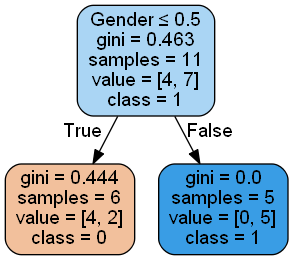

In [26]:
# visualize decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = Data_feature,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Define evalution metrics for your model performance

In [27]:
#evaluation matrix 

print("Confusion Matrix : ",co_mx)

Confusion Matrix :  [[0 1]
 [1 1]]


## (Age <21 , Income = Low, Gender = Female, Marital Status = Married) <== Test

In [28]:
#map all values which we have mapped previously
# Age <21 => 1
# Income = Low => 1
# Gender = Female => 1
# Marital Status = Married => 1
model.predict([[1, 1, 1, 1]])

array([1], dtype=int64)

This returns 1 i.e. buy lipstick